
# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

    My goals from this data analysis
    1- check who is the best director ?
        to address this problem we are going to use the mean/sum of the revenue/popularity/votes
        check which one is the best 
    2- check what is the corelation between time and revenue/budget?
        using the mean of the revenue/budget during each year 
    3- check what is the corelation between time and votes?
        finding that ,means we can understand how mush cinema interest have increased during the last few decades
    4- check how many movies and is there and how many movies with repeated names?
        

we are going to try understand the data set using different visualization after cleaning the data set totally 

# I've used TMDB Dataset 

In [1]:
# !wget https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd 
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
data =pd.read_csv("tmdb-movies.csv")

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
data.info() # you can observe that there is too much null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### there is a lot null values 

you can see them in columns like 

imdb_id, cast , home page(#Too Much) ,director , tagline ,keywords,overview ,genres,production_comapnies, 

In [4]:
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## from the dataset above

we can remove some columns like overview ,id , imdb_id , original title ,tagline,homepage


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

### remove unused columns

In [5]:
columns_to_drop=["overview" ,"id" , "imdb_id"  ,"tagline","homepage"]
# for column in columns_to_drop:
data.drop(columns_to_drop,axis=1,inplace =True) 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
keywords                9373 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(5), object(7)
memory usage: 1.3+ MB


#### we still have some extra(quite too much comparing to the others) nulls in keywords, production companies

let's check if we can fix that before dropping them 

In [6]:
data[data["production_companies"].isnull()] # i think we can full the nulls with unknown 

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
228,0.584363,0,0,Racing Extinction,Elon Musk|Jane Goodall|Louie Psihoyos|Leilani ...,Louie Psihoyos,animal species|earth|scientist|globe|activist,90,Adventure|Documentary,NaN,1/24/15,36,7.8,2015,0.000000e+00,0.000000e+00
259,0.476341,0,0,Crown for Christmas,Danica McKellar|Rupert Penry-Jones|Ellie Botte...,Alex Zamm,NaN,84,TV Movie,NaN,11/27/15,10,7.6,2015,0.000000e+00,0.000000e+00
295,0.417191,0,0,12 Gifts of Christmas,Katrina Law|Donna Mills|Aaron O'Connell|Melani...,Peter Sullivan,christmas,84,Family|TV Movie,NaN,11/26/15,12,6.3,2015,0.000000e+00,0.000000e+00
298,0.370258,0,0,The Girl in the Photographs,Kal Penn|Claudia Lee|Kenny Wormald|Toby Heming...,Nick Simon,serial killer|tied feet|tied up while barefoot,95,Crime|Horror|Thriller,NaN,9/14/15,10,4.7,2015,0.000000e+00,0.000000e+00
328,0.367617,0,0,Advantageous,Jacqueline Kim|James Urbaniak|Freya Adams|Ken ...,Jennifer Phang,identity|unemployment|dystopic future|woman di...,92,Science Fiction|Drama|Family,NaN,6/23/15,29,6.4,2015,0.000000e+00,0.000000e+00
370,0.314199,0,2334228,Meru,Conrad Anker|Grace Chin|Jimmy Chin|Amee Hinkley,Jimmy Chin|Elizabeth Chai Vasarhelyi,himalaya|climbing|india|mountaineering|woman d...,89,Adventure|Documentary,NaN,1/25/15,42,6.9,2015,0.000000e+00,2.147489e+06
374,0.302474,0,0,The Sisterhood of Night,Kara Hayward|Georgie Henley|Olivia DeJonge|Lau...,Caryn Waechter,witch|woman director,104,Mystery|Drama|Thriller,NaN,4/10/15,25,6.6,2015,0.000000e+00,0.000000e+00
382,0.295946,0,0,Unexpected,Cobie Smulders|Gail Bean|Anders Holm|Elizabeth...,Kris Swanberg,woman director,90,Drama|Comedy,NaN,7/24/15,22,5.7,2015,0.000000e+00,0.000000e+00
388,0.289526,700000,0,Walter,Andrew J. West|Justin Kirk|Virginia Madsen|Wil...,Anna Mastro,god|woman director,87,Drama|Comedy,NaN,3/13/15,12,5.2,2015,6.439997e+05,0.000000e+00
393,0.283194,2000000,0,Night Of The Living Deb,Maria Thayer|Chris Marquette|Ray Wise|Michael ...,Kyle Rankin,NaN,85,Comedy|Horror,NaN,8/29/15,13,5.7,2015,1.839999e+06,0.000000e+00


### solving production companies columns
I've Searched some of them on google , What I've found that they are some dicuomentary and not popular we can fill tha nans with unknown 

In [7]:
data["production_companies"].fillna("unknown",inplace=True) # i think we can full the nulls with unknown 
sum(data["production_companies"].isna())#checking 

0

In [8]:
data[data["keywords"].isnull()] 

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
130,1.284541,0,4719695,True Story,Jonah Hill|James Franco|Felicity Jones|Maria D...,Rupert Goold,NaN,100,Crime|Drama|Mystery,Plan B Entertainment|Regency Enterprises|New R...,4/17/15,354,6.0,2015,0.000000e+00,4.342117e+06
149,1.041922,20000000,0,Momentum,Olga Kurylenko|Morgan Freeman|James Purefoy|Je...,Stephen S. Campanelli,NaN,96,Thriller|Action,Thaba Media|Azari Media,8/1/15,100,5.8,2015,1.839999e+07,0.000000e+00
154,1.008474,12000000,0,Il racconto dei racconti,Salma Hayek|Vincent Cassel|John C. Reilly|Toby...,Matteo Garrone,NaN,125,Romance|Fantasy|Horror,HanWay Films|Rai Cinema|Le Pacte|Fonds Eurimag...,5/14/15,211,5.7,2015,1.104000e+07,0.000000e+00
155,1.007054,11000000,27391084,Irrational Man,Emma Stone|Joaquin Phoenix|Jamie Blackley|Park...,Woody Allen,NaN,95,Mystery|Drama,Sony Pictures|Gravier Productions,7/17/15,319,6.1,2015,1.012000e+07,2.519979e+07
160,0.950793,12000000,60273173,The Perfect Guy,Michael Ealy|Sanaa Lathan|Morris Chestnut|Kath...,David M. Rosenthal,NaN,100,Drama|Thriller,Screen Gems,9/11/15,122,5.6,2015,1.104000e+07,5.545129e+07
164,0.917040,0,0,Kidnapping Mr. Heineken,Anthony Hopkins|Jim Sturgess|Sam Worthington|R...,Daniel Alfredson,NaN,95,Drama|Action|Crime|Thriller,Umedia|Informant Europe SPRL|European Film Com...,3/12/15,131,5.8,2015,0.000000e+00,0.000000e+00
178,0.836941,0,3002884,The End of the Tour,Jason Segel|Jesse Eisenberg|Anna Chlumsky|Mami...,James Ponsoldt,NaN,106,Drama,A24,7/31/15,126,7.3,2015,0.000000e+00,2.762652e+06
180,0.829111,20000000,6420319,Little Boy,Jakob Salvati|Emily Watson|Cary-Hiroyuki Tagaw...,Alejandro Monteverde,NaN,106,Comedy|Drama|War,Metanoia Films,4/23/15,113,7.1,2015,1.839999e+07,5.906691e+06
182,0.820691,0,1986615,Remember,Christopher Plummer|Martin Landau|Dean Norris|...,Atom Egoyan,NaN,94,Drama|Thriller,Serendipity Point Films|Egoli Tossell Film AG,10/23/15,75,7.7,2015,0.000000e+00,1.827685e+06
189,0.781809,0,0,The Benefactor,Dakota Fanning|Theo James|Richard Gere|Clarke ...,Andrew Renzi,NaN,90,Drama,KSM,4/17/15,55,4.5,2015,0.000000e+00,0.000000e+00


### solving keywords columns
I've Searched some of them on google , What I've found that they are not bad movies , what I think that the movie owner didn't add any keywords or may be, there is an error in collecting the data

In [9]:
data["keywords"].fillna("unknown",inplace=True) # i think we can full the nulls with unknown 
sum(data["keywords"].isna())#checking 

0

In [10]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
keywords                10866 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    10866 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(5), object(7)
memory usage: 1.3+ MB


### remove null values 

In [11]:
#imdb_id, cast , home page ,director , tagline ,keywords,overview ,genres,production_comapnies, 
# data[data['homepage'].is_null()]
data.dropna(inplace=True) 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 16 columns):
popularity              10732 non-null float64
budget                  10732 non-null int64
revenue                 10732 non-null int64
original_title          10732 non-null object
cast                    10732 non-null object
director                10732 non-null object
keywords                10732 non-null object
runtime                 10732 non-null int64
genres                  10732 non-null object
production_companies    10732 non-null object
release_date            10732 non-null object
vote_count              10732 non-null int64
vote_average            10732 non-null float64
release_year            10732 non-null int64
budget_adj              10732 non-null float64
revenue_adj             10732 non-null float64
dtypes: float64(4), int64(5), object(7)
memory usage: 1.4+ MB


### remove duplicates 

In [12]:
print(sum(data.duplicated()))
data.drop_duplicates(inplace=True)
sum(data.duplicated())# this the one we have discovered 

1


0

### index reseting
so now we have a dataset with no duplicates and null values , we can start correcting the data types

In [13]:
data.reset_index(inplace=True)
print(data.info())
data.drop("index",axis=1,inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10731 entries, 0 to 10730
Data columns (total 17 columns):
index                   10731 non-null int64
popularity              10731 non-null float64
budget                  10731 non-null int64
revenue                 10731 non-null int64
original_title          10731 non-null object
cast                    10731 non-null object
director                10731 non-null object
keywords                10731 non-null object
runtime                 10731 non-null int64
genres                  10731 non-null object
production_companies    10731 non-null object
release_date            10731 non-null object
vote_count              10731 non-null int64
vote_average            10731 non-null float64
release_year            10731 non-null int64
budget_adj              10731 non-null float64
revenue_adj             10731 non-null float64
dtypes: float64(4), int64(6), object(7)
memory usage: 1.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeI

### realease date correction 
we need to transfer it for a datetime type 

In [14]:
data["release_date"]=pd.to_datetime(data["release_date"])

In [15]:
import string
print("column ----> type")
for column in data.columns.values:
        print(column," ----> ",type(data[column][0]))

#         data[column]=data[column].astype(str)
                
#                 print(column)
        



column ----> type
popularity  ---->  <class 'numpy.float64'>
budget  ---->  <class 'numpy.int64'>
revenue  ---->  <class 'numpy.int64'>
original_title  ---->  <class 'str'>
cast  ---->  <class 'str'>
director  ---->  <class 'str'>
keywords  ---->  <class 'str'>
runtime  ---->  <class 'numpy.int64'>
genres  ---->  <class 'str'>
production_companies  ---->  <class 'str'>
release_date  ---->  <class 'pandas._libs.tslibs.timestamps.Timestamp'>
vote_count  ---->  <class 'numpy.int64'>
vote_average  ---->  <class 'numpy.float64'>
release_year  ---->  <class 'numpy.int64'>
budget_adj  ---->  <class 'numpy.float64'>
revenue_adj  ---->  <class 'numpy.float64'>


### final checking 
we can see that there is some objects but they are already string with names of the movies,cast ,directors , doesn't need a lo of change we can start the EDA Process now 

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10731 entries, 0 to 10730
Data columns (total 16 columns):
popularity              10731 non-null float64
budget                  10731 non-null int64
revenue                 10731 non-null int64
original_title          10731 non-null object
cast                    10731 non-null object
director                10731 non-null object
keywords                10731 non-null object
runtime                 10731 non-null int64
genres                  10731 non-null object
production_companies    10731 non-null object
release_date            10731 non-null datetime64[ns]
vote_count              10731 non-null int64
vote_average            10731 non-null float64
release_year            10731 non-null int64
budget_adj              10731 non-null float64
revenue_adj             10731 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(6)
memory usage: 1.3+ MB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### is the cinema revenues increase the revenues or not ? 

In [17]:
data.describe() #general view

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10731.000000,1.073100e+04,1.073100e+04,10731.000000,10731.000000,10731.000000,10731.000000,1.073100e+04,1.073100e+04
mean,0.652615,1.480365e+07,4.031989e+07,102.468829,219.812972,5.964710,2001.259622,1.776530e+07,5.200623e+07
std,1.004804,3.106456e+07,1.176524e+08,30.493873,578.815324,0.930283,12.820151,3.446630e+07,1.454252e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.210765,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.387081,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.720889,1.600000e+07,2.500000e+07,112.000000,148.000000,6.600000,2011.000000,2.110885e+07,3.470546e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Intersting that there some movies with zero budget ,revenue we can check 
# Q1 what movies without revenue ?

how many movies with out budget ? is the movies with no budget have got any revenue ?

In [18]:
zero_budget_movies=data[data["budget"]==0]
zero_budget_movies.shape

(5578, 16)

### this is a mistake in the data 
I think when they just filled these values with zero I will replace it with the mean 

In [19]:
zero_revenue_movies=data[data["revenue"]==0]
zero_revenue_movies.shape

(5888, 16)

In [20]:
data['revenue'].replace(0,data['revenue'].mean(),inplace=True)
data[data["revenue"]==0].shape #zero

(0, 16)

In [21]:
data['budget'].replace(0,data['budget'].mean(),inplace=True)


# Q2  Check if the mean of the budget increasing or decresing overtime ?

In [22]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
mean_revenue=data.groupby('release_year').mean().reset_index()
mean_revenue[['budget','revenue']].head()

,budget,revenue
0,1.132940e+07,3.603132e+07
1,1.008396e+07,3.820767e+07
2,1.003712e+07,3.571679e+07
3,1.217104e+07,3.753065e+07
4,1.186658e+07,4.075852e+07


In [23]:
mean_revenue.head()

,release_year,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
0,1960,0.458932,1.132940e+07,3.603132e+07,110.656250,77.531250,6.325000,5.082036e+06,3.340991e+07
1,1961,0.422827,1.008396e+07,3.820767e+07,119.419355,77.580645,6.374194,1.085687e+07,7.947167e+07
2,1962,0.454783,1.003712e+07,3.571679e+07,124.343750,74.750000,6.343750,1.232693e+07,4.856238e+07
3,1963,0.502706,1.217104e+07,3.753065e+07,111.323529,82.823529,6.329412,1.535687e+07,3.924580e+07
4,1964,0.412428,1.186658e+07,4.075852e+07,109.214286,74.690476,6.211905,6.608980e+06,5.707603e+07


In [24]:
def plot_graph(table,x,y,x_label,y_label,title,kind="line"):
    table.plot(x=x,y=y,title=title,kind=kind)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    

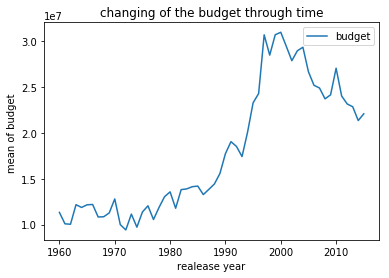

In [25]:
% matplotlib inline
import matplotlib.pyplot as plt
plot_graph(table=mean_revenue,x='release_year',y='budget',x_label="realease year",y_label="mean of budget ",title="changing of the budget through time")
# mean_revenue.plot(x='release_year',y='budget',title="changing of the budget through time")# this totally positive cor
# plt.xlabel("release_year")

#### we are checking the correlation between the budget and the release year of the movie 
you can see the trend increasing then decreasing , this is most probably because 2007 economic crisis 

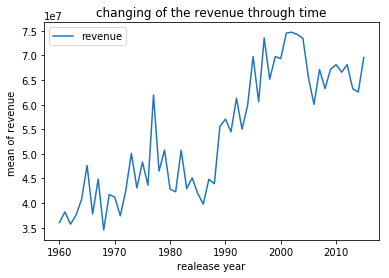

In [26]:
# mean_revenue.plot(x='release_year',y='revenue')# this totally positive cor
plot_graph(table=mean_revenue,x='release_year',y='revenue',x_label="realease year",y_label="mean of revenue ",title="changing of the revenue through time")


##### here we are comparing between the mean revenue of each year and the realeased year of each movie 
It's obvious that there is an increasing trend 

In [27]:
# mean_revenue["revenue"].min()["release_year"]

mean_revenue[mean_revenue["revenue"]==mean_revenue["revenue"].max()]["release_year"] 

42    2002
Name: release_year, dtype: int64

### observation
It's obvious that with time the production company were spending extra money on the movies , until the ecenomic crisis in 2008 It's start decreasing 

# Q3 is there any movies with the same name ?



yes there is , I didn't expect that 
I've searched on google to see if they are some a series like harry potter but I find that some of them is the same movie with different actors 

In [28]:
data['original_title'].value_counts()  

Hamlet                                   4
Life                                     3
Oliver Twist                             3
Julia                                    3
Alice in Wonderland                      3
The Black Hole                           3
Frankenstein                             3
A Christmas Carol                        3
The Three Musketeers                     3
Hercules                                 3
Emma                                     3
Carrie                                   3
Beauty and the Beast                     3
Wuthering Heights                        3
Shelter                                  3
Annie                                    3
Jane Eyre                                3
The Gift                                 2
The Signal                               2
The Double                               2
Cyberbully                               2
Hairspray                                2
The Omen                                 2
Journey to 

# Q4 what is the director with highest revenues mean?

In [29]:
mean_revenue_for_director=data.groupby('director').mean().reset_index()
mean_revenue_for_director.head()

,director,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,FrÃ©dÃ©ric Jardin,0.434506,2.500000e+06,3.358000e+03,98.0,28.0,5.9,2011.0,2.423495e+06,3.255239e+03
1,A. Todd Smith,1.876037,1.480365e+07,4.031989e+07,0.0,11.0,5.4,2015.0,0.000000e+00,0.000000e+00
2,A.R. Murugadoss,0.215030,9.100000e+06,7.600000e+07,183.0,53.0,6.9,2008.0,9.216358e+06,7.697178e+07
3,Aaron Aites,0.108700,1.480365e+07,4.031989e+07,93.0,13.0,6.5,2008.0,0.000000e+00,0.000000e+00
4,Aaron Blaise|Robert Walker,1.653031,1.000000e+08,2.500000e+02,85.0,753.0,6.8,2003.0,1.185353e+08,2.963382e+02


In [30]:
mean_revenue_for_director[mean_revenue_for_director["revenue"]==max(mean_revenue_for_director["revenue"])]

,director,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
2814,Kyle Balda|Pierre Coffin,7.404165,74000000.0,1.156731e+09,91.0,2893.0,6.5,2015.0,6.807997e+07,1.064192e+09


####  check his movies 


In [31]:
# director_name=mean_revenue_for_director[mean_revenue_for_director["revenue"]==max(mean_revenue_for_director["revenue"])]["director"]
# type(director_name)
# director_name
data[data['director']=="Kyle Balda|Pierre Coffin"]

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
8,7.404165,74000000.0,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,assistant|aftercreditsstinger|duringcreditssti...,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2015-06-17,2893,6.5,2015,6.807997e+07,1.064192e+09


### It apears that's they just have one movie but it has to much profits compared to the others 
#### I wasn't convinced with this output so I made extra analysis


# Q5  let's check if there is any director with more than one movie in the dataset ?

In [32]:
data["director"].value_counts() # there is a directors with huge amount of movies 

Woody Allen                                                                                45
Clint Eastwood                                                                             34
Steven Spielberg                                                                           29
Martin Scorsese                                                                            28
Ridley Scott                                                                               23
Steven Soderbergh                                                                          22
Ron Howard                                                                                 22
Joel Schumacher                                                                            21
Brian De Palma                                                                             20
Wes Craven                                                                                 19
Barry Levinson                                              

#### use case  check woody allen 

In [33]:
woody = data[data["director"]=="Woody Allen"]
woody.shape

(45, 16)

# important observation 
### time make a huge difference in the budget and revenue 
so in this case you can that woody allen have a lot of movies(45) and Kyle Balda|Pierre Coffin have only one movie but It was in 2015 
the amount of people watching movies in the recent years is alot more than the ones in the 90es
the money value has also decresed through time so 10 milion in 2015 surely a lot in value less than the same value 1995


# Q6  we can check the votes/popularity as a better indication of the best director ?
another observation we need to divide the voters * number of reviews to have a better estimation (as a weighting for every row )



In [34]:
data["better_vote_estimation"]=data["vote_average"]*data["vote_count"]


In [35]:
mean_vote_for_director=data.groupby('director').mean().reset_index()


In [36]:
mean_vote_for_director[mean_vote_for_director["better_vote_estimation"]==max(mean_vote_for_director["better_vote_estimation"])]

,director,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,better_vote_estimation
1289,Don Hall|Chris Williams,8.691294,165000000.0,652105443.0,102.0,4185.0,7.8,2014.0,1.519800e+08,6.006485e+08,32643.0


In [37]:
mean_vote_for_director[mean_vote_for_director["popularity"]==max(mean_vote_for_director["popularity"])]

,director,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,better_vote_estimation
891,Colin Trevorrow,16.696886,75375000.0,758768301.0,104.5,2951.5,6.6,2013.5,6.935612e+07,6.981261e+08,19218.85


### we gonna check both director

In [38]:
data[data["director"]=="Don Hall|Chris Williams"]

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,better_vote_estimation
623,8.691294,165000000.0,652105443.0,Big Hero 6,Scott Adsit|Ryan Potter|Daniel Henney|T.J. Mil...,Don Hall|Chris Williams,brother brother relationship|hero|talent|reven...,102,Adventure|Family|Animation|Action|Comedy,Walt Disney Pictures|Walt Disney Animation Stu...,2014-10-24,4185,7.8,2014,1.519800e+08,6.006485e+08,32643.0


In [39]:
data[data["director"]=="Colin Trevorrow"]

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,better_vote_estimation
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,36153.0
4528,0.408010,750000.0,4.007792e+06,Safety Not Guaranteed,Aubrey Plaza|Mark Duplass|Jake Johnson|Karan S...,Colin Trevorrow,time travel,85,Comedy|Romance|Science Fiction|Drama,Duplass Brothers Productions|Big Beach Films,2012-06-08,341,6.7,2012,7.123082e+05,3.806378e+06,2284.7


## Q7 why  there is a lot of old good movies not in the best (revenue/votes/popularity) ? 

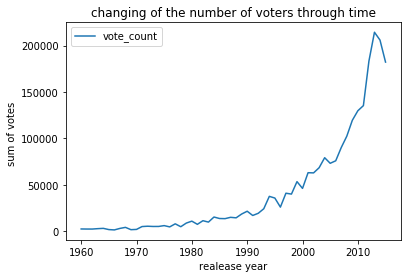

In [40]:
mean_vote_for_director=data.groupby('release_year').sum().reset_index()
# mean_vote_for_director.plot(y="vote_count",x="release_year")
plot_graph(table=mean_vote_for_director,x='release_year',y='vote_count',x_label="realease year",y_label="sum of votes ",title="changing of the number of voters through time")


#### here we are comparing we try to see the relation between the number of voters and the date of the released movie 

## Observation 
so here why we can't compare the old one with the new ones ,they are almost no one is voting for the old ones 

# Q8  check if I was correct by adding unknown values to the dataset ?
we can check the difference between the "unknown" values we have added in  key words and production companies

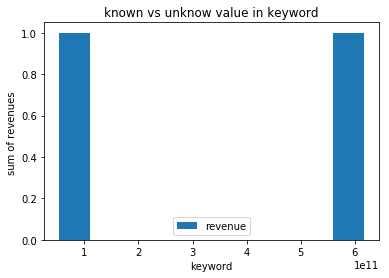

In [52]:
# mean_vote_for_director=data.groupby('release_year').sum().reset_index()
data["keyword_unknown"]=data["keywords"]=="unknown"
data["keyword_unknown"]=data["keyword_unknown"].astype(int)
keyword_effectivness=data.groupby('keyword_unknown').sum().reset_index()
keyword_effectivness
# keyword_effectivness.plot(x="keyword_unknown",y="revenue",xlabel="known vs unknown",ylabel="revenue"kind="hist")
plot_graph(table=keyword_effectivness,x='keyword_unknown',y='revenue',x_label="keyword",y_label="sum of revenues ",title="known vs unknow value in keyword",kind='hist')

#### here we are comparing between known and unknow keywords  in the data to check if the unknown values affect the data

and it apears that there is no difference 
I've used histogram to make it easier to compare

In [42]:
keyword_effectivness

,keyword_unknown,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,better_vote_estimation
0,0,6588.466644,2.203555e+11,6.164571e+11,962373,2304424,55839.3,18615904,1.853613e+11,5.517967e+11,15254288.2
1,1,414.742065,2.107718e+10,5.361916e+10,137220,54389,8168.0,2859613,5.278120e+09,6.282168e+09,320747.1


### so It apears that the movie creators has put a keywords but the dataset didn't include it because both have the almost the same values

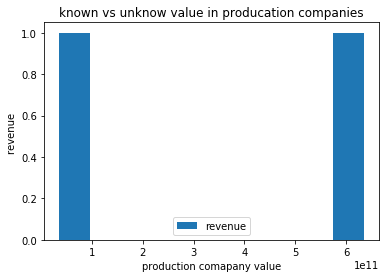

In [55]:
# production companies
data["unknown companies"]=data["production_companies"]=="unknown"
# data["unknown companies"]=data["unknown companies"]
keyword_effectivness=data.groupby('unknown companies').sum().reset_index()
mapping={0:False,1:True}
keyword_effectivness["unknown companies"].map(mapping)
# keyword_effectivness
# keyword_effectivness.plot(x="unknown companies",y="revenue",kind="hist")
plot_graph(table=keyword_effectivness,x='unknown companies',y='revenue',x_label="production comapany value",y_label="revenue ",title="known vs unknow value in producation companies",kind='hist')

#### here we are comparing between known and unknown production company values to check if it affects the revenue 

##### hence they both seems identical we can consider that it's not affecting the revenues

### so It apears that the movies has put a production companies but the dataset didn't include it because both have the almost the same values

### so if the rest of the data is correct we can't remove this data because it has no values in this column , surely we wil need to use to make a better models



<a id='conclusions'></a>
## Conclusions

So what I have observed that the data set is quite intersitng
I've found a lot of insights 

    1- dataset has a lot of missing values but you can replace it with the mean in the revenue , budget (because it's not logical that anyone made a movie without both , at least will get more than zero)
    2- there is a missing values in key words and production companies the dataset you shouldn't remove those to have more data just add a value to represent that ,I've added unknown
    3-the revenues and budget of the movies increase with time for two reasons 
        1-peaple have more interest in watching movies 
        2- the value of money decrease with time 
    4-the economic crsis greatly affected the cinema it has a lot of decrease in both revenue and budget 
    5-We can't compare between the old and new directors from this dataset because both weren't on the same situitaion and even the old one have less popularity/votes because there isn't alot of peaple voting for it like the new ones 
    6-Woody Allen has a tha highest number of movies  
    7- despite Allen has this much of movies he is not he most popular/voted one because of what we mention in  5
    8- there a lot of movies with the same name but that's doesn't implay that they are different parts of the same movies , some time it the same story with different actors 
there some limitaion of this data set 

    1-we can make a lot of comparison of we have the same amount of peaple vote for every movie
    2-if we have the null values of these columns we could have a better estimation
    3-I think If there some feature for the profesional reviews and another one for the normal reviewer so we can compare between both would be intersting 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])